In [3]:
import numpy as np # 수학 연산 수행을 위한 모듈
import pandas as pd # 데이터 처리를 위한 모듈
import seaborn as sns # 데이터 시각화 모듈
import matplotlib.pyplot as plt # 데이터 시각화 모듈

1. 데이터 읽고 정보 확인하기

In [4]:
# CSV 파일 읽어오기
data_frame = pd.read_csv("male_female.csv")

data_frame.info()
data_frame.head(5)

for col in data_frame.columns: 
    print(col) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        43 non-null     int64
 1   Height    43 non-null     int64
 2   Weight    43 non-null     int64
 3   FeetSize  43 non-null     int64
 4   Year      43 non-null     int64
 5   Sex       43 non-null     int64
dtypes: int64(6)
memory usage: 2.1 KB
Id
Height
Weight
FeetSize
Year
Sex


2. 데이터 시각화 및 분석

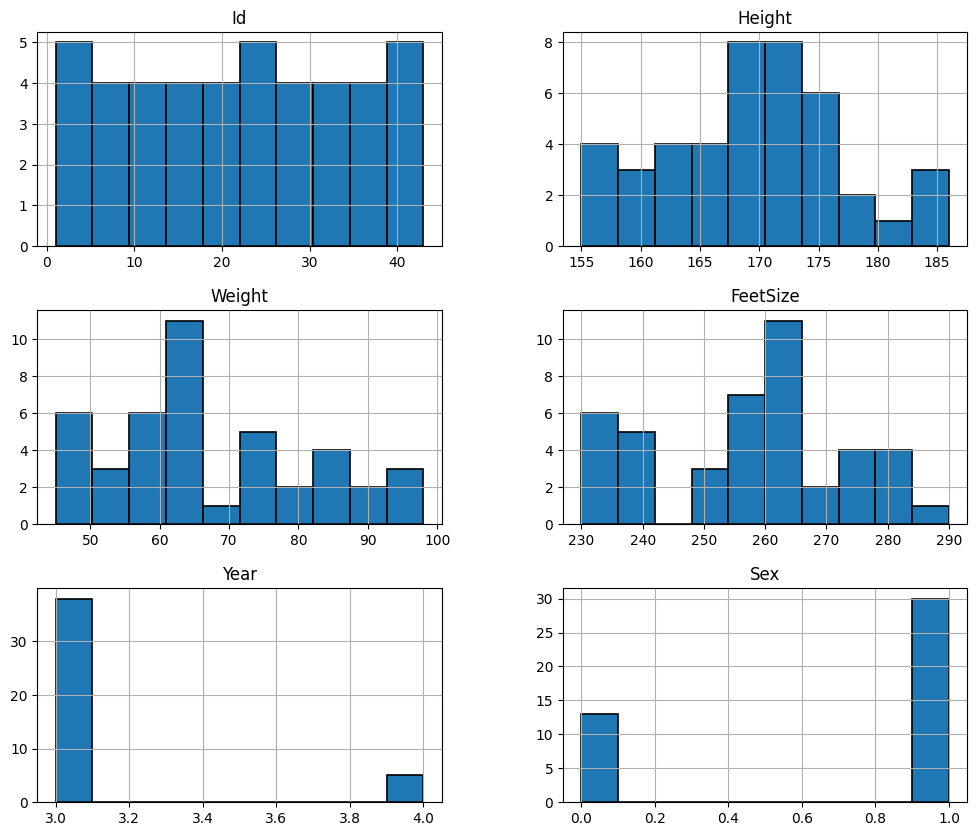

In [5]:
data_frame.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [20]:
def drawGraph(x_value, y_value, z_value) :
    cl = data_frame[z_value].unique()

    col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

    fig = data_frame[data_frame[z_value] == cl[0]].plot(kind='scatter', x=x_value, y=y_value, color=col[0], label=cl[0])

    for i in range(len(cl)-1):
        data_frame[data_frame[z_value] == cl[i+1]].plot(kind='scatter', x=x_value, y=y_value, color=col[i+1], label=cl[i+1], ax=fig)

    fig.set_xlabel(x_value)
    fig.set_ylabel(y_value)
    fig.set_title(x_value + " vs. " + y_value)
    fig=plt.gcf()
    fig.set_size_inches(10, 6)
    plt.show()

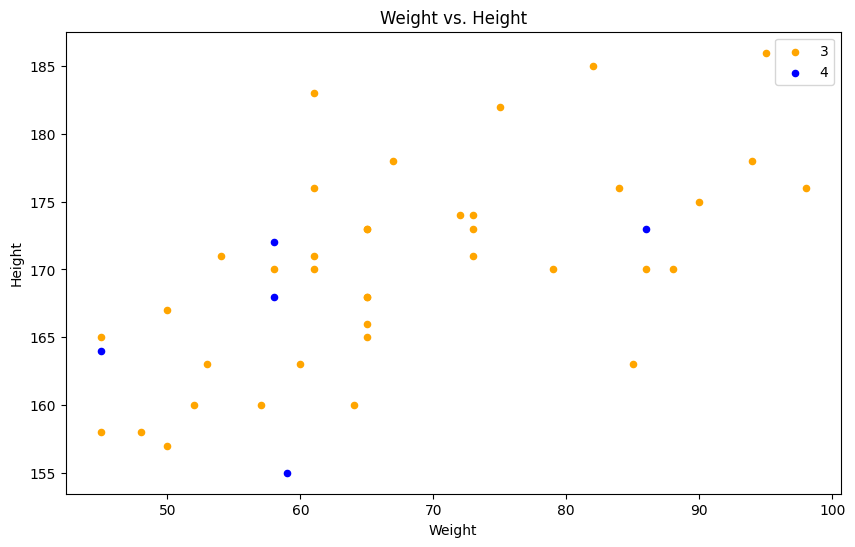

In [22]:
drawGraph('Weight', 'Height', 'Year')

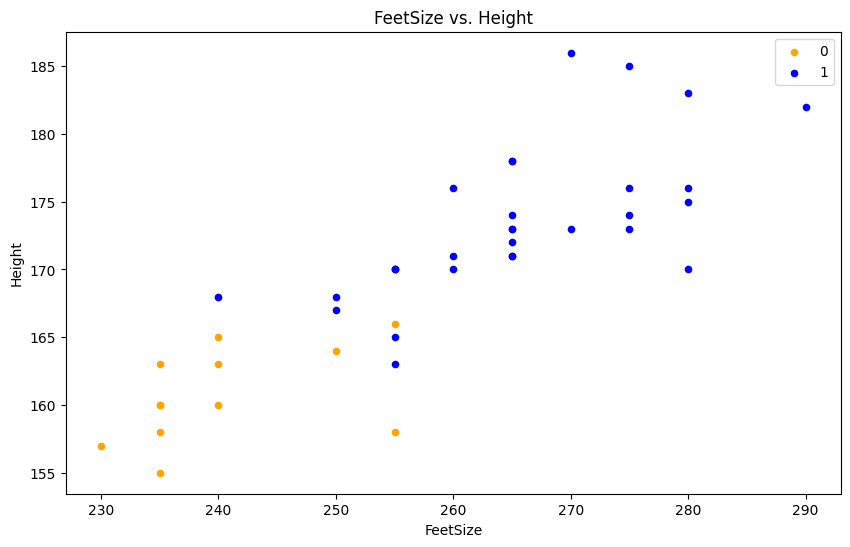

In [6]:
# 읽어온 데이터 표시하기


[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'FeetSize')]

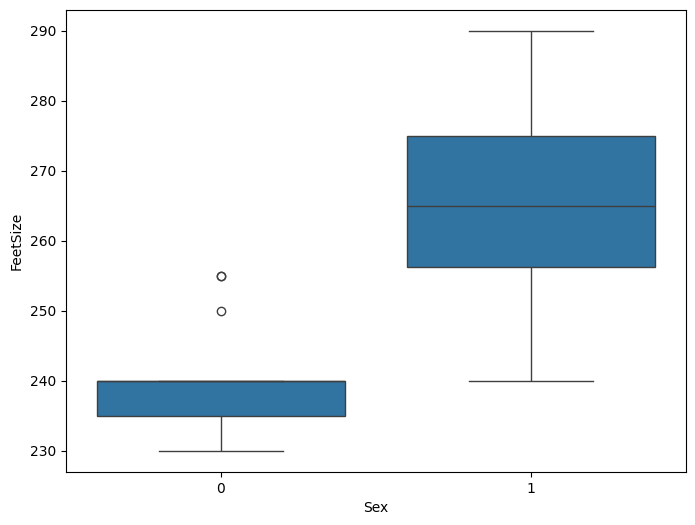

In [7]:
f, sub = plt.subplots(1, 1,figsize=(8,6))
sns.boxplot(x=data_frame['Sex'],y=data_frame['FeetSize'], ax=sub)
sub.set(xlabel='Sex', ylabel='FeetSize')

<Axes: xlabel='Sex', ylabel='Height'>

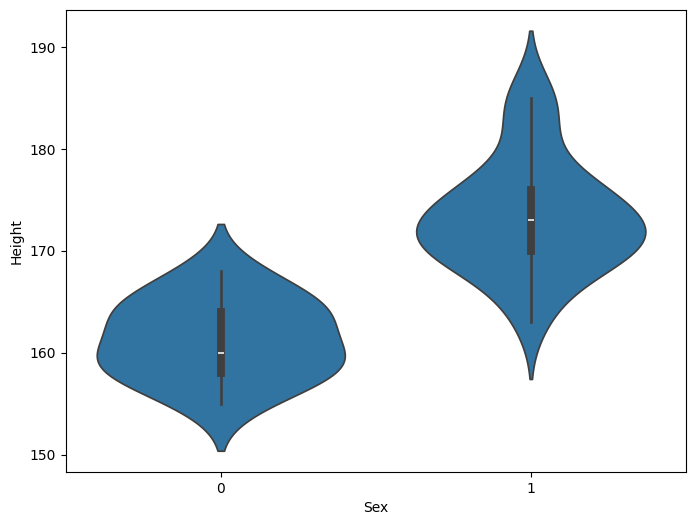

In [8]:
plt.figure(figsize=(8,6))
plt.subplot(1,1,1)
sns.violinplot(x='Sex',y='Height',data=data_frame)

[Text(0.5, 0, 'Height'), Text(0.5, 0.5, 'Weight'), Text(0.5, 0, 'FeetSize')]

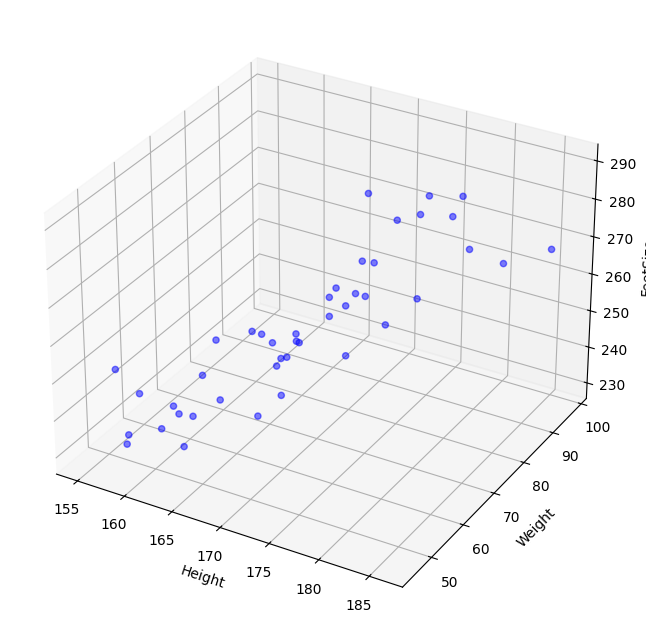

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(data_frame['Height'],data_frame['Weight'],data_frame['FeetSize'],c="blue",alpha=.5)
ax.set(xlabel='Height',ylabel='Weight',zlabel='FeetSize')

3. 데이터 전처리

4. 학습용, 테스트용으로 데이터 분할

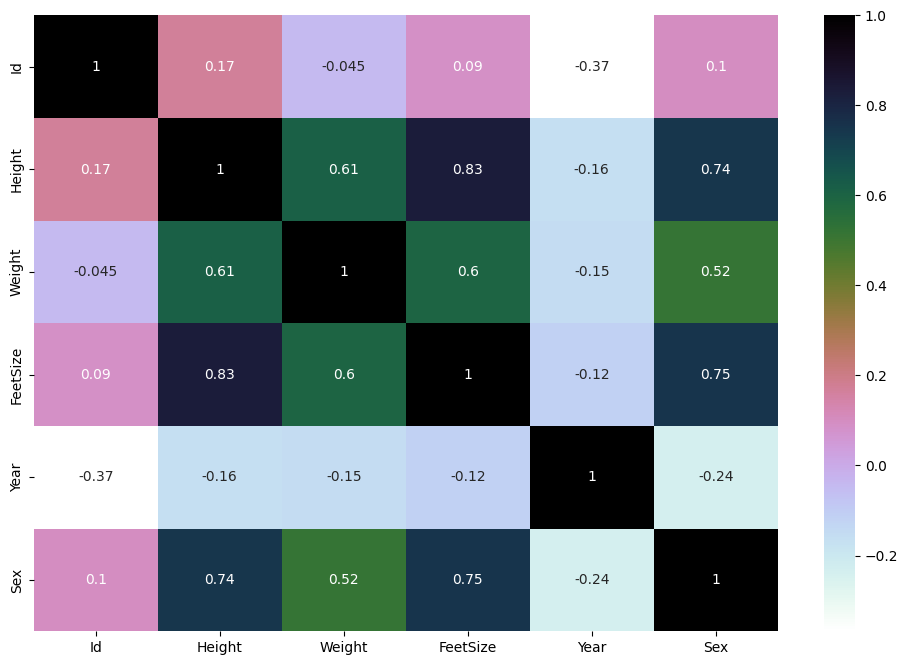

In [10]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data_frame.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_frame, test_size = 0.2)

# train=70% and test=30%
print(train.shape)
print(test.shape)

# 학습용 문제, 학습용 정답
train_X = train[['Height','FeetSize']] # 키와 발크기만 선택
train_y = train.Sex # 정답 선택

# 테스트용 문제, 테스트용 정답
test_X = test[['Height','FeetSize']] # taking test data features
test_y = test.Sex   #output value of test data

(34, 6)
(9, 6)


5. 머신러닝 모델 학습과 테스트

In [12]:
# 다양한 분류 알고리즘 패키지를 임포트함.
from sklearn.linear_model import LogisticRegression  # Logistic Regression 알고리즘
#from sklearn.cross_validation import train_test_split # 데이타 쪼개주는 모듈 

from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

5.1 써포트 벡터 머신(SVM) 알고리즘 이용하여 알아맞추기

In [13]:
gildong = svm.SVC()
gildong.fit(train_X,train_y) # 가르친 후
prediction = gildong.predict(test_X) # 얼마나 맞히는지 테스트

rate1 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate1))

인식률: 77.8


5.2 논리 회귀(Logistic Regression) 알고리즘 이용하여 알아맞추기

In [14]:
cheolsu = LogisticRegression()
cheolsu.fit(train_X,train_y)
prediction = cheolsu.predict(test_X)

rate2 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate2))

인식률: 100.0


5.3 결정 트리(Decision Tree) 알고리즘 이용하여 알아맞추기

In [15]:
youngja = DecisionTreeClassifier()
youngja.fit(train_X,train_y)
prediction = youngja.predict(test_X)

rate3 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate3))

인식률: 88.9


5.4 근접 이웃(K-Nearest Neighbours) 알고리즘 이용하여 알아맞추기

In [16]:
minsu = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
minsu.fit(train_X,train_y)
prediction = minsu.predict(test_X)

rate4 = metrics.accuracy_score(prediction,test_y) * 100
print('인식률: {0:.1f}'.format(rate4))

인식률: 88.9


5.5 비교

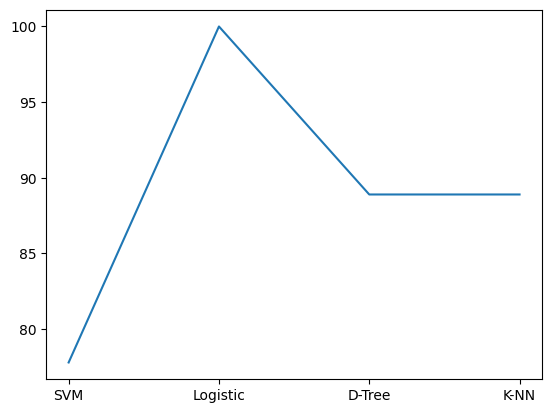

In [17]:
plt.plot(['SVM','Logistic','D-Tree','K-NN'], [rate1, rate2, rate3, rate4])

5.6 기타 특성(몸무게)를 추가 이용

In [18]:
train_X = train[['Height','FeetSize','Weight']] # 키와 발크기뿐만 아니라 몸무게도 추가
train_y = train.Sex # 정답 선택

test_X = test[['Height','FeetSize','Weight']] # taking test data features
test_y = test.Sex   #output value of test data

인식률: 44.44, 100.00, 88.89, 100.00


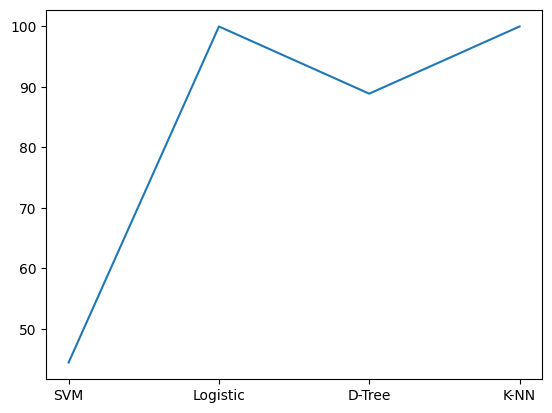

In [19]:
def run_4_classifiers(a, b, c, d):
    tmp = svm.SVC() # 애기 
    tmp.fit(a,b) # 가르친 후
    prediction = tmp.predict(c) # 테스트
    rate1 = metrics.accuracy_score(prediction,test_y) * 100

    tmp = LogisticRegression()
    tmp.fit(a,b)
    prediction = tmp.predict(c)
    rate2 = metrics.accuracy_score(prediction,test_y) * 100

    tmp = DecisionTreeClassifier()
    tmp.fit(a,b)
    prediction = tmp.predict(c)
    rate3 = metrics.accuracy_score(prediction,test_y) * 100

    tmp = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
    tmp.fit(a,b)
    prediction = tmp.predict(c)
    rate4 = metrics.accuracy_score(prediction,test_y) * 100
    
    plt.plot(['SVM','Logistic','D-Tree','K-NN'], [rate1, rate2, rate3, rate4])
    print('인식률: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(rate1, rate2, rate3, rate4))
    
    
run_4_classifiers(train_X, train_y, test_X, test_y)

6. 결론

- 데이터를 분석하고, 상관관계를 이해할 수 있다.
- 4가지 머신러닝 알고리즘을 이용하여 학습을 시키고 테스트를 수행할 수 있다.
- 특징을 2개만 이용할 때보다는 3개를 이용할 때가 성능은 향상되었다.